In [20]:
!pip install kaggle
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [21]:
import json
token = {"username":"fatemehy","key":"e6177841494493a99d3da8b61bab2fb1"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets list

- path is now set to: {/content}
ref                                                             title                                                size  lastUpdated          downloadCount  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge               COVID-19 Open Research Dataset Challenge (CORD-19)    3GB  2020-06-10 00:09:23           2985  
roche-data-science-coalition/uncover                            UNCOVER COVID-19 Challenge                          179MB  2020-05-21 18:57:53           3203  
kwullum/fatal-police-shootings-in-the-us                        Fatal Police Shootings in the US                      1MB  2017-09-22 19:18:21          15293  
Cornell-University/arxiv                                        ArXiv Metadata                                        2GB  2020-05-06 23:18:35             70  
longngu

In [22]:
!kaggle datasets list -s avocado-prices
!kaggle datasets download -d neuromusic/avocado-prices     -p /content
!unzip \*.zip

ref                                                   title                                              size  lastUpdated          downloadCount  
----------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
neuromusic/avocado-prices                             Avocado Prices                                    629KB  2018-06-06 05:28:35          67929  
alanluo418/avocado-prices-20152019                    The Price and Sales of Avocado                    920KB  2020-01-14 21:25:40            284  
sayan11/avocado-prices                                Avocado Prices                                    629KB  2018-08-11 19:04:12            116  
arunsankar/avocado                                    Avocado                                           845KB  2018-09-13 16:29:33             53  
nahhii/pricesales-of-avocado-in-newyork-year20162019  Price&Sales of Avocado in New-York year2016-2019    2KB  2

In [23]:
# Load data into Pandas Dataframe
import pandas as pd
df = pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [24]:
#Does the dataset include any missing values? If so, delete the missing values entries
df.isnull().sum(axis = 0)

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [59]:
df2=df.drop(['region','Date','Unnamed: 0','4046','4225','4770'],axis=1)
new_index=['type','AveragePrice','Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags','year']
df2=df2.reindex(columns=new_index)
# df2.set_index(['year', 'month'])
df2.head()

,type,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,conventional,1.33,64236.62,8696.87,8603.62,93.25,0.0,2015
1,conventional,1.35,54876.98,9505.56,9408.07,97.49,0.0,2015
2,conventional,0.93,118220.22,8145.35,8042.21,103.14,0.0,2015
3,conventional,1.08,78992.15,5811.16,5677.40,133.76,0.0,2015
4,conventional,1.28,51039.60,6183.95,5986.26,197.69,0.0,2015


In [60]:
#Preprocessing
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df2['type'])
df2['type']= encoder.transform(df2['type'])
# breast_cencer.drop('id',axis=1,inplace=True)
# breast_cancer.drop('Unnamed: 32',axis=1,inplace=True)
# breast_cancer['diagnosis'] = breast_cancer['diagnosis'].map({'M':1,'B':0})
# breast_cancer.head()
df2.dropna()

,type,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,0,1.33,64236.62,8696.87,8603.62,93.25,0.0,2015
1,0,1.35,54876.98,9505.56,9408.07,97.49,0.0,2015
2,0,0.93,118220.22,8145.35,8042.21,103.14,0.0,2015
3,0,1.08,78992.15,5811.16,5677.40,133.76,0.0,2015
4,0,1.28,51039.60,6183.95,5986.26,197.69,0.0,2015
...,...,...,...,...,...,...,...,...
18244,1,1.63,17074.83,13498.67,13066.82,431.85,0.0,2018
18245,1,1.71,13888.04,9264.84,8940.04,324.80,0.0,2018
18246,1,1.87,13766.76,9394.11,9351.80,42.31,0.0,2018
18247,1,1.93,16205.22,10969.54,10919.54,50.00,0.0,2018


In [61]:
a=df2[df2.columns[0:]].corr() ['AveragePrice'][:]
a
# result=a[abs(a)>0.6]
# result

type            0.615845
AveragePrice    1.000000
Total Volume   -0.192752
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
XLarge Bags    -0.117592
year            0.093197
Name: AveragePrice, dtype: float64

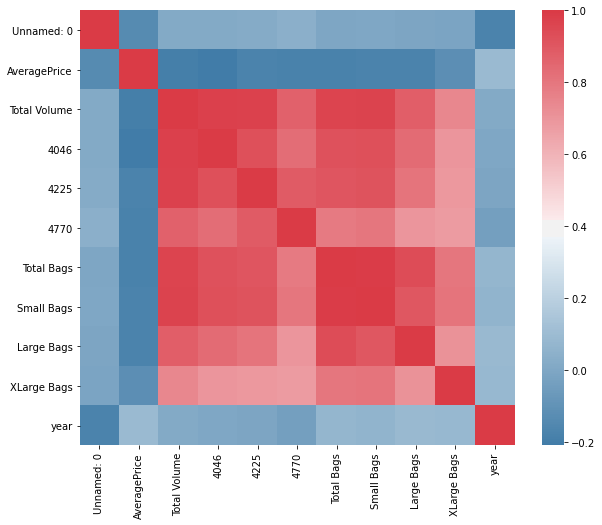

In [62]:
import matplotlib.pyplot as pl
import seaborn as sns

f, ax = pl.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

In [65]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df2.iloc[:,1:])
y = df2.iloc[:, 0].values
print(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=1) 

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
# Choose value of K
K = 4
model = KNeighborsRegressor(n_neighbors=K)
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 
score = model.score(X_test,y_test)
r2_score=r2_score(y_test,y_pred)
print('r2_score: ',r2_score)


# #import required packages
# from sklearn import neighbors
# from sklearn.metrics import mean_squared_error 
# from math import sqrt
# import matplotlib.pyplot as plt
# %matplotlib inline
# rmse_val = [] #to store rmse values for different k
# for K in range(20):
#     K = K+1
#     model = neighbors.KNeighborsRegressor(n_neighbors = K)

#     model.fit(X_train, y_train)  #fit the model
#     pred=model.predict(X_test) #make prediction on test set
#     error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
#     rmse_val.append(error) #store rmse values
#     print('RMSE value for k= ' , K , 'is:', error)

# #plotting the rmse values against k values
# curve = pd.DataFrame(rmse_val) #elbow curve 
# curve.plot()

#find the optimum value of 'n_neighbours'
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':range(1,15)}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
print('best parameter: ',model.best_params_)



[0 0 0 ... 1 1 1]
r2_score:  0.9166323387220416
best parameter:  {'n_neighbors': 4}


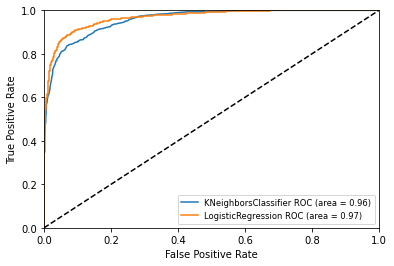

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
# from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
kfold = 7 
result = {} 
trn_train, trn_test, trg_train, trg_test = train_test_split(X, y, test_size=0.25) 
knn = KNeighborsClassifier(n_neighbors = 200) 
log_reg = LogisticRegression( tol=0.001) 
scores = cross_val_score(knn, X, y, cv = kfold)
result['KNeighborsClassifier'] = scores.mean()
scores = cross_val_score(log_reg, X, y, cv = kfold)
result['LogisticRegression'] = scores.mean()
pl.clf()

knn_result = knn.fit(trn_train, trg_train).predict_proba(trn_test)
fpr, tpr, thresholds = roc_curve(trg_test, knn_result[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('KNeighborsClassifier',roc_auc))

logreg_result = log_reg.fit(trn_train, trg_train).predict_proba(trn_test)
fpr, tpr, thresholds = roc_curve(trg_test, logreg_result[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('LogisticRegression',roc_auc))
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.legend(loc=0, fontsize='small')